In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.drop(["day", "month", "year"], axis = 1, inplace = True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [5]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [6]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [7]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

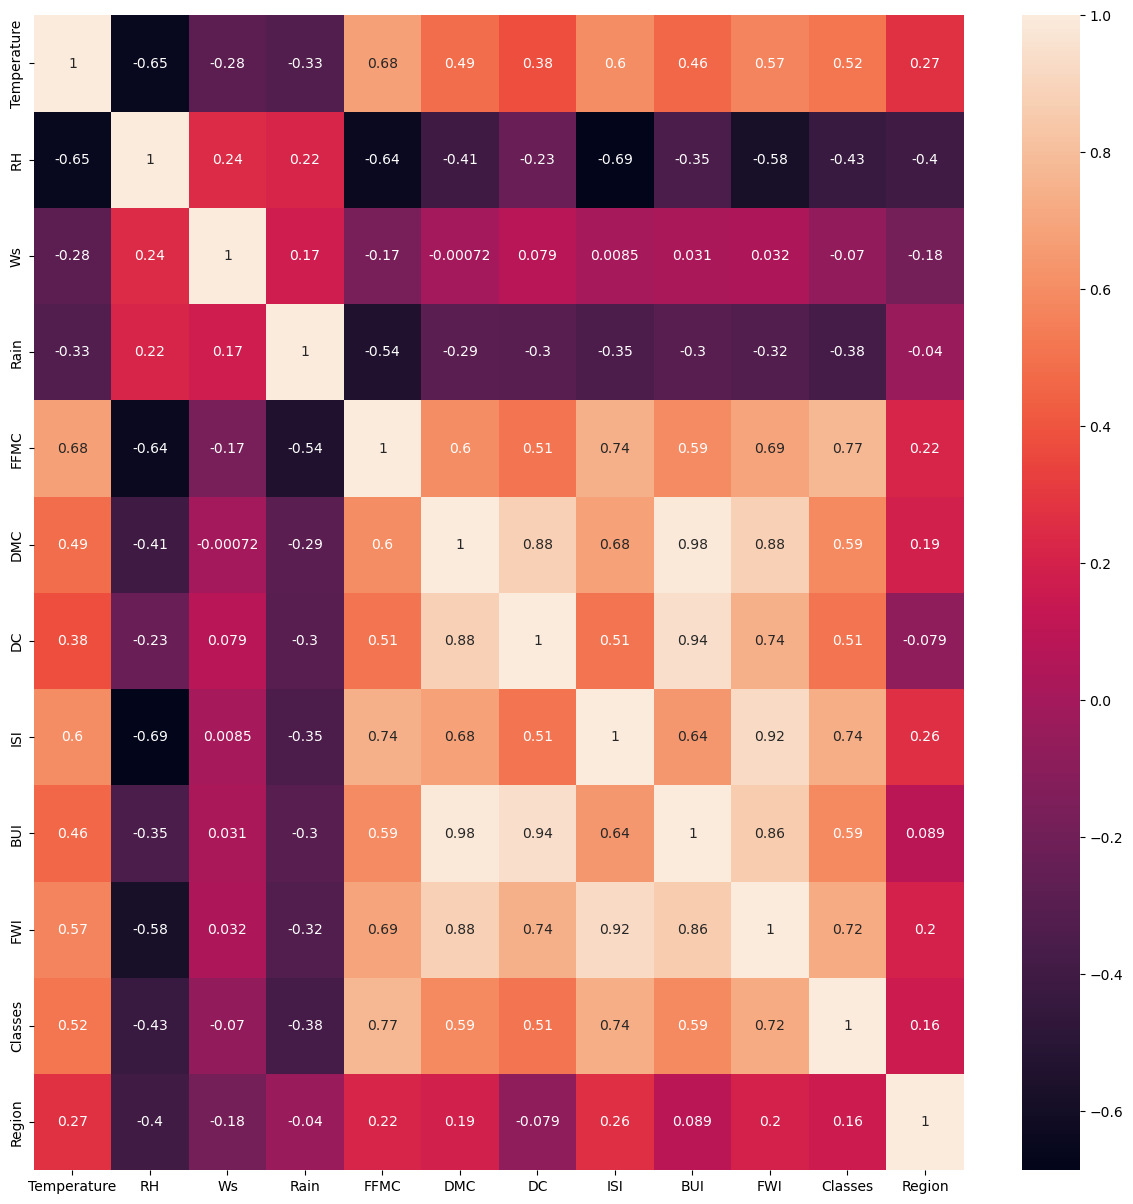

In [8]:
plt.figure(figsize=(15, 15))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [9]:
X = df.drop("FWI", axis = 1)
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [10]:
y = df.FWI
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [12]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0


In [13]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
24,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,1,0
152,28,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0,1
232,34,58,13,0.2,79.5,18.7,88.0,2.1,24.4,0,1
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1


In [14]:
y_train.head()

97      0.9
141     0.3
192    21.6
68      2.6
119     0.9
Name: FWI, dtype: float64

In [15]:
y_test.head()

24     8.4
6      7.2
152    0.5
232    3.8
238    6.5
Name: FWI, dtype: float64

In [16]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

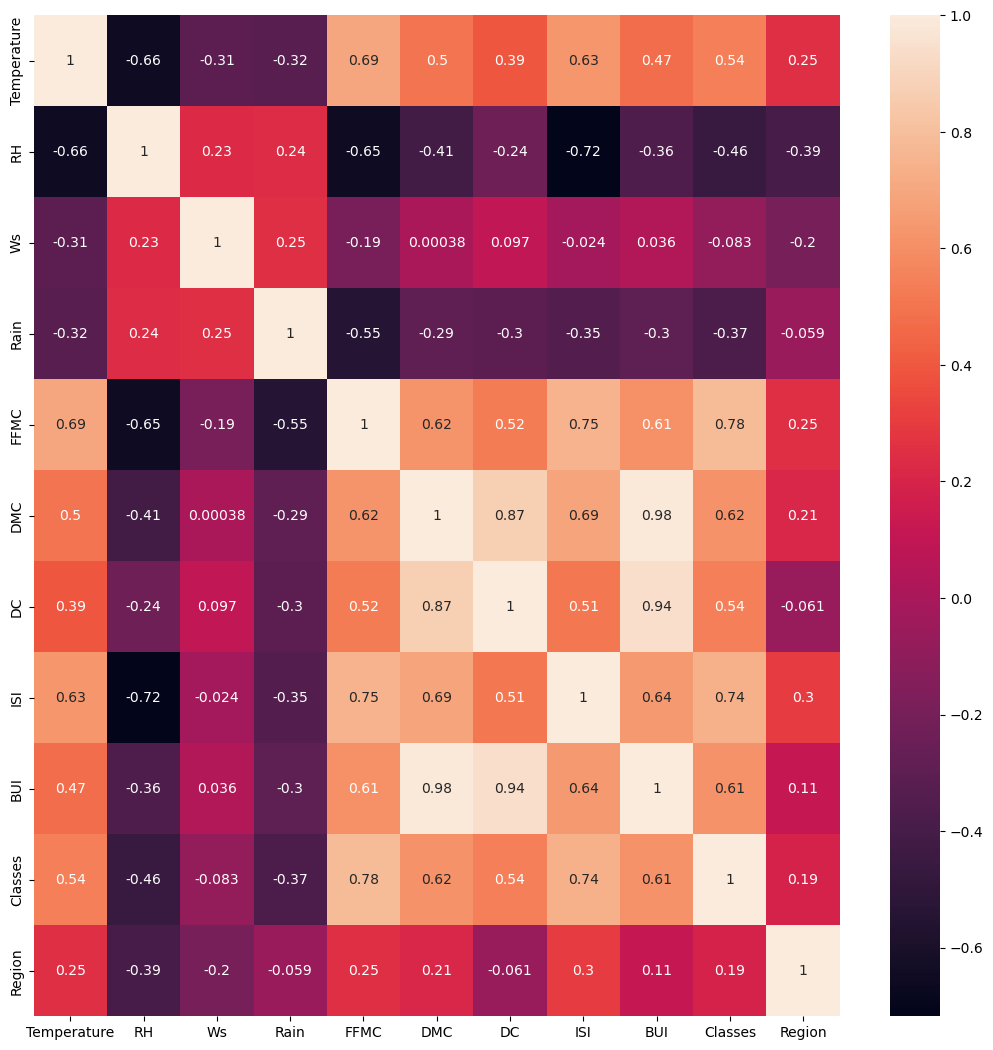

In [17]:
plt.figure(figsize = (13, 13))
corr = X_train.corr()
sns.heatmap(corr, annot = True)

In [18]:
df.corr().columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
len(df.corr().columns)

12

In [20]:
X_train.shape

(182, 11)

In [21]:
X_test.shape

(61, 11)

In [22]:
y_train.shape

(182,)

In [23]:
y_test.shape

(61,)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
X_train

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.77269802,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.90344718,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.38339978,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.03419633,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.18383528,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.99290713,
        -1.10431526, -0.98907071]])

In [26]:
X_test

array([[-3.73215184e-01,  1.86526055e-01, -7.56034558e-02,
        -3.93465417e-01,  5.75516485e-01, -2.71484039e-02,
         3.36284944e-01,  3.33219559e-01,  1.53729172e-01,
         8.05387266e-01, -1.01653005e+00],
       [ 2.18112770e-01, -5.15825141e-01, -6.90511563e-01,
        -3.93465417e-01,  6.80353750e-01, -3.98035193e-01,
        -4.01240004e-01,  5.29474389e-01, -4.09071705e-01,
         8.05387266e-01, -1.01653005e+00],
       [-1.26020712e+00, -2.34884662e-01,  8.46758705e-01,
         1.07328622e+00, -1.03198825e+00, -9.75928561e-01,
        -8.88493723e-01, -9.28418633e-01, -9.87083417e-01,
        -1.24163870e+00,  9.83738754e-01],
       [ 5.13776747e-01, -2.34884662e-01, -6.90511563e-01,
        -2.60124359e-01,  7.22976113e-02,  3.60988933e-01,
         8.72264035e-01, -6.76090995e-01,  6.17659624e-01,
        -1.24163870e+00,  9.83738754e-01],
       [-6.68879162e-01,  2.56761175e-01, -3.83057509e-01,
        -3.93465417e-01,  4.84657521e-01,  1.28106531e-01,
  

In [27]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = linear_regression.predict(X_test)
y_pred

array([ 9.174852  ,  8.27534174, -0.73429689,  5.27508825,  7.07102156,
        0.94675207,  2.18943584,  8.1044688 ,  1.50539649,  3.09945599,
       -0.55869999,  6.17767439, 10.6275993 , 18.61664286, 21.72236765,
        0.98184378,  1.4829759 , -1.02752852,  7.37691844,  3.09856236,
        1.03041953, -0.52765755,  7.11178723, -0.59765609, 24.56137177,
        5.30598017,  6.24134627, 11.05590561, -0.90651775, 10.98625471,
        6.86201211, -0.87597047, 11.47573368, 16.8499431 ,  1.00779908,
        0.18327221,  1.60131272,  6.45983348, -1.18692414, -1.30012851,
        7.46805874,  1.28542009,  9.25716272, -1.3815076 , 17.37431478,
        8.66482571,  8.43739989,  0.49565798, 14.1062815 ,  0.33373353,
       32.60097847,  5.7705428 , 20.00281333, 22.72086224, 16.37748925,
       18.36935832,  0.24991703,  9.76178103,  3.79317436, 16.61244551,
        5.47398249])

In [29]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(linear_regression, X_train, y_train, scoring = "neg_mean_squared_error", cv = 3)
validation_score

print (np.mean(validation_score))

-2.7535819382474815


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mae

0.9903501531731703

In [31]:
mse = mean_squared_error(y_test, y_pred)
mse

1.632164845494407

In [32]:
rmse = np.sqrt(mse)
rmse

1.2775620710925975

In [33]:
score = r2_score(y_test, y_pred)
score

0.9631237047751696

In [34]:
ar2_score = (1 - (1 - score)*(len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)) * 100
ar2_score

95.4845352785922

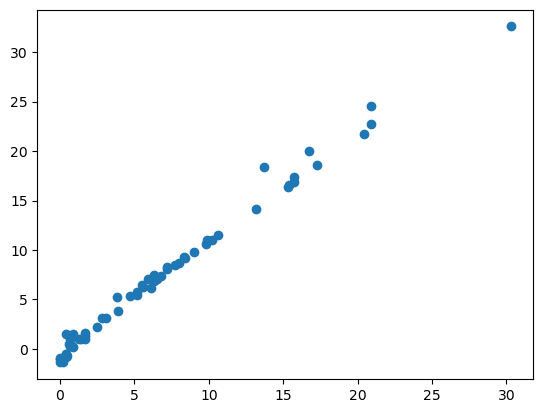

In [35]:
plt.scatter(y_test, y_pred)

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([ 8.71212586,  8.13049441,  0.4524247 ,  5.84113033,  7.40005187,
        2.32919305,  3.32226125,  8.08546096,  2.42033346,  3.85521703,
        0.92649864,  8.84346386, 10.2580266 , 17.02806709, 18.78837443,
        2.47550486,  1.83747362, -1.23887359,  7.51886623,  3.97134954,
        2.62425258,  0.33897281,  7.09632629,  0.20416378, 21.82032886,
        5.7804785 ,  6.26168006, 10.24087416, -1.48999406, 10.79683306,
        6.9838348 ,  0.39171071, 10.68860963, 14.81197409,  2.33638646,
        1.85804687,  2.52004767,  6.60507662, -0.4786999 , -0.41689152,
        7.01486498,  2.62728983,  8.75889995, -1.38268368, 16.03911012,
        8.51964009,  8.72621775,  1.37045909, 13.41400661,  1.37095093,
       28.33581324,  6.19895379, 18.01816261, 19.52451398, 14.65212319,
       15.93658976,  1.80061606,  9.75066912,  4.73949811, 15.08620838,
        6.08532177])

In [37]:
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mae

0.9903501531731703

In [38]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_lasso

1.0980172812168072

In [39]:
rmse_lasso = np.sqrt(mse_lasso)
rmse

1.2775620710925975

In [40]:
score_lasso = r2_score(y_test, y_pred_lasso)
score_lasso

0.9751919608268176

In [41]:
ar2_score_lasso = (1 - (1 - score)*(len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)) * 100
ar2_score_lasso

95.4845352785922

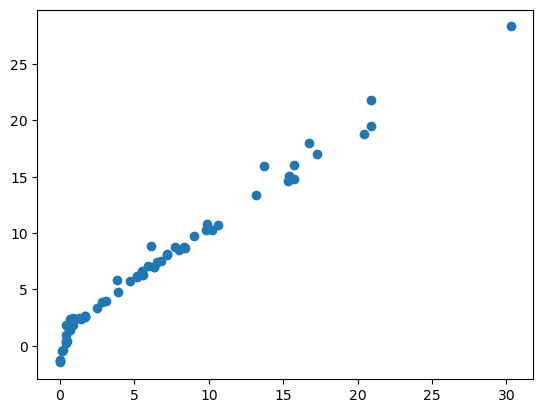

In [42]:
plt.scatter(y_test, y_pred_lasso)

In [43]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv = 5)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5)

In [44]:
lasso_cv.alpha_

0.053395191056015395

In [45]:
lasso_cv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [46]:
lasso_cv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.19961097, 14.9991189 ,  9.9

In [47]:
y_pred_lasso_cv = lasso_cv.predict(X_test)
y_pred_lasso_cv

array([ 9.03613211,  8.1519872 , -0.65945217,  5.51549309,  7.15396804,
        1.18268786,  2.4400396 ,  7.89296059,  1.65400032,  3.19410352,
       -0.21653269,  8.37751095, 10.5679617 , 18.51726698, 21.33638668,
        1.27588059,  1.02403747, -1.60846865,  7.45152051,  3.1068096 ,
        1.60645204, -0.44359777,  6.95738411, -0.6700017 , 24.30394013,
        5.16462296,  6.10129295, 10.9123849 , -1.69377523, 11.2001134 ,
        6.95268746, -0.82688566, 11.39021028, 16.55979867,  1.24821282,
        0.58774553,  1.66957412,  6.29352738, -1.26517144, -1.13261035,
        7.22610797,  1.48574399,  8.96130281, -1.8190731 , 17.34396379,
        8.67022528,  8.69142931,  0.44023989, 14.23740253,  0.4322825 ,
       32.09405254,  5.72337451, 19.82253816, 22.21891404, 16.29737154,
       17.9699957 ,  0.55142612,  9.89869782,  4.02004563, 16.3242045 ,
        5.61823788])

In [48]:
mae_lasso_cv = mean_absolute_error(y_test, y_pred_lasso_cv)
mae_lasso_cv

0.9494200732650465

In [49]:
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
mse_lasso_cv

1.5287584727069532

In [50]:
rmse_lasso_cv = np.sqrt(mse_lasso_cv)
rmse_lasso_cv

1.2364297281717846

In [51]:
score_lasso_cv = r2_score(y_test, y_pred_lasso_cv)
score_lasso_cv

0.965460015314859

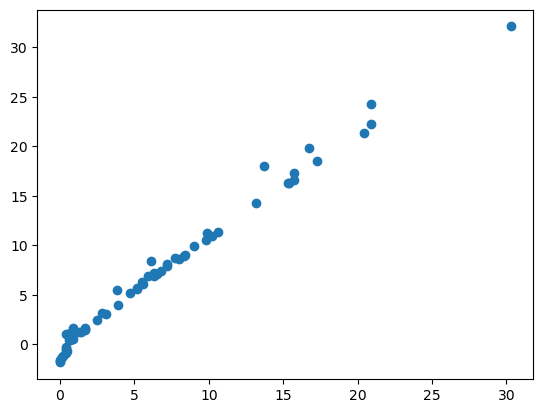

In [52]:
plt.scatter(y_test, y_pred_lasso_cv)

In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [54]:
mae = mean_absolute_error(y_test, y_pred_ridge)
mae

0.9862632654772773

In [55]:
mse = mean_squared_error(y_test, y_pred_ridge)
mse

1.571142488318001

In [56]:
rmse = np.sqrt(rmse)
rmse

1.1302929138469362

In [57]:
score_ridge = r2_score(y_test, y_pred_ridge)
score_ridge

0.9645024126089795

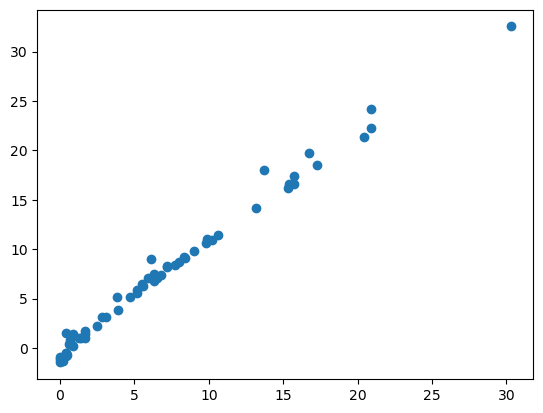

In [58]:
plt.scatter(y_test, y_pred_ridge)

In [59]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv = 5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge_cv = ridge_cv.predict(X_test)
y_pred_ridge_cv

array([ 9.06937127,  8.28874199, -0.67047908,  5.14215598,  7.11693296,
        0.81876247,  2.22800557,  8.17879626,  1.41287642,  3.12006085,
       -0.53446868,  9.03932081, 10.57711031, 18.52500015, 21.34337285,
        0.97657381,  1.5474562 , -1.16662682,  7.36328798,  3.17975518,
        0.98461973, -0.48584472,  7.11928769, -0.58055346, 24.16849932,
        5.20017168,  6.22017646, 10.90538478, -0.90663763, 10.98180852,
        6.79372745, -0.81061327, 11.40475528, 16.56181888,  1.04965743,
        0.20973737,  1.69658158,  6.51259459, -1.28926365, -1.31211492,
        7.50015074,  1.36500916,  9.22194521, -1.472395  , 17.38885816,
        8.65200434,  8.3784664 ,  0.4310633 , 14.13713699,  0.39191033,
       32.53323959,  5.87973167, 19.68810774, 22.26258407, 16.21855912,
       17.98446315,  0.25893034,  9.81482512,  3.81521966, 16.54365552,
        5.5454161 ])

In [60]:
mae_ridge_cv = mean_absolute_error(y_test, y_pred_ridge_cv)
mae_ridge_cv

0.9862632654772773

In [61]:
mse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
mse_ridge_cv

1.571142488318001

In [62]:
rmse_ridge_cv = np.sqrt(mse_ridge_cv)
rmse_ridge_cv

1.2534522281754503

In [63]:
score_ridge_cv = r2_score(y_test, y_pred_ridge_cv)
score_ridge_cv

0.9645024126089795

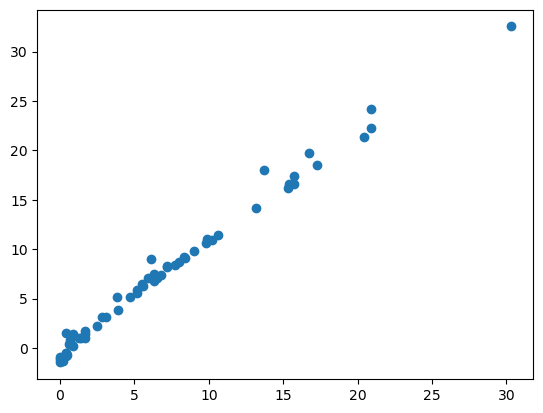

In [64]:
plt.scatter(y_test, y_pred_ridge_cv)

In [65]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)
y_pred_elastic

array([ 8.78735738,  8.02148893,  0.83555083,  6.88744196,  7.73157379,
        3.01342683,  3.76241729,  9.57505499,  2.38210128,  4.50244074,
        1.10857633, 10.95888001, 10.08102326, 15.58478221, 17.91977573,
        3.05654818,  2.83518061, -1.80605935,  7.17330262,  5.60772785,
        1.9525741 ,  0.27056772,  7.08015486,  0.24028014, 17.67991288,
        7.08612294,  7.08456456, 10.58456242, -2.29106909,  9.72176209,
        6.55548036,  0.97980033, 10.26286884, 15.11953827,  2.57753416,
        2.25849549,  3.26822907,  8.51331309, -0.9583158 , -1.0897629 ,
        9.00819547,  2.91433245,  9.24447109, -1.86997941, 14.43741137,
        8.32113099,  8.2264481 ,  1.50625016, 12.44222072,  1.45660109,
       26.01721903,  7.9053257 , 14.42515541, 18.77397188, 13.53264592,
       16.85571544,  2.37911101,  9.31778196,  5.11052237, 14.84691997,
        6.75202557])

In [66]:
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mae_elastic

1.4688359019578359

In [67]:
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
mse_elastic

3.2395162894142713

In [68]:
rmse_elastic = np.sqrt(mse_elastic)
rmse_elastic

1.799865630933118

In [69]:
score_elastic = r2_score(y_test, y_pred_elastic)
score_elastic

0.9268080308163352

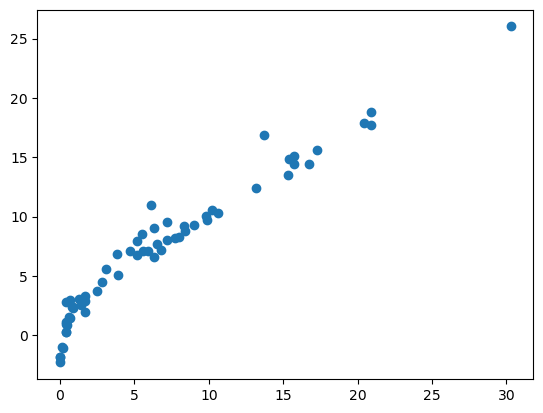

In [70]:
plt.scatter(y_test,y_pred_elastic)

In [71]:
from sklearn.linear_model import ElasticNetCV
elastic_cv = ElasticNetCV(cv = 5)
elastic_cv.fit(X_train, y_train)
y_pred_ecv =elastic_cv.predict(X_test)
y_pred_ecv

array([ 8.99983034,  8.20212493, -0.54880668,  5.44253433,  7.21603756,
        1.11489055,  2.41865198,  8.37255295,  1.42706691,  3.29056664,
       -0.33071356,  9.69713418, 10.54837008, 18.33136556, 21.03754855,
        1.30773128,  1.42069279, -1.61757222,  7.32668348,  3.45310364,
        1.17781913, -0.52307561,  7.03392579, -0.61923902, 23.54112178,
        5.45823408,  6.25252763, 10.88631501, -1.52048018, 10.97167658,
        6.75754078, -0.69043152, 11.28905013, 16.46399865,  1.21444877,
        0.50158459,  1.80117411,  6.75872491, -1.41335996, -1.28326971,
        7.63023807,  1.48226439,  9.12278318, -1.82799693, 17.15672934,
        8.6175699 ,  8.48288677,  0.44089373, 14.09257877,  0.45107318,
       31.93849873,  6.16452979, 19.18637174, 21.8932569 , 15.99967795,
       17.92288834,  0.56934529,  9.84971765,  3.99792941, 16.41285052,
        5.76651534])

In [72]:
mae_ecv = mean_absolute_error(y_test, y_pred_ecv)
mae_ecv

0.9664985239584867

In [73]:
mse_ecv = mean_squared_error(y_test, y_pred_ecv)
mse_ecv

1.5160030738544683

In [74]:
rmse_ecv = np.sqrt(mse_ecv)
rmse_ecv

1.2312607659852028

In [75]:
score_ecv = r2_score(y_test, y_pred_ecv)
score_ecv

0.9657482042530616

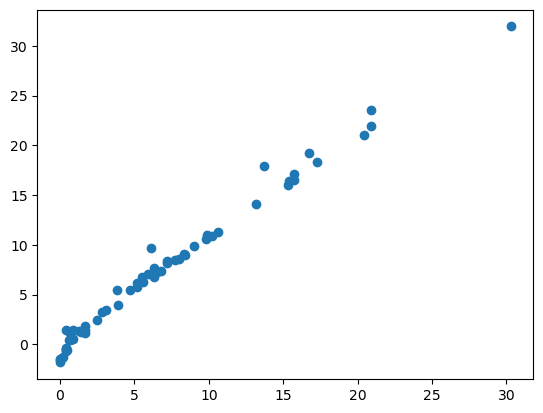

In [76]:
plt.scatter(y_test, y_pred_ecv)